# Run on VIIRS Extracted?

In [23]:
# imports
from importlib import reload
import os
import numpy as np

import h5py

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from skimage.transform import downscale_local_mean, resize_local_mean

from ulmo import io as ulmo_io
from ulmo.utils import image_utils
from ulmo.plotting import plotting
from ulmo.mae import reconstruct_LLC
from ulmo.mae import models_mae

# Extracted image

In [4]:
sst_path = os.getenv('OS_SST')

In [5]:
viirs_ex_file = os.path.join(sst_path, 'VIIRS', 'Extractions', 'VIIRS_2012_95clear_192x192_inpaint.h5')

In [6]:
f_ex = h5py.File(viirs_ex_file, 'r')
f_ex.keys()

<KeysViewHDF5 ['fields', 'inpainted_masks', 'metadata']>

In [8]:
f_ex['fields'].shape, f_ex['inpainted_masks'].shape

((985068, 192, 192), (985068, 192, 192))

## An example

In [19]:
all_mask = np.isfinite(f_ex['inpainted_masks'][0,...])
np.sum(all_mask)/all_mask.size

0.034369574652777776

In [20]:
img0 = f_ex['fields'][0,...]
img0.shape

(192, 192)

<Axes: >

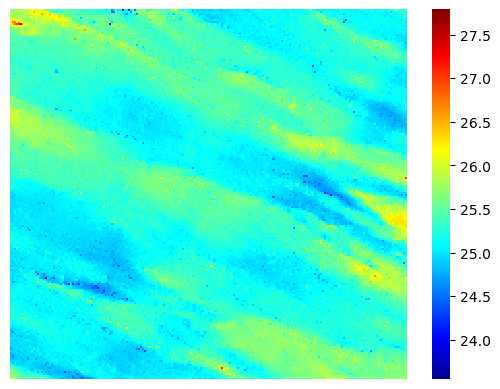

In [21]:
plotting.show_image(img0)

# Here goes nothing

## Load model

In [14]:
t=35
chkpt_file = os.path.join(os.getenv('OS_OGCM'), 'LLC', 'Enki', 'models', f'mae_t{t}_399.pth')
model = models_mae.prepare_model(chkpt_file)

<All keys matched successfully>


## Let her rip

In [22]:
rimg = np.resize(img0, (192,192,1))
#rimg = np.resize(img0, (64,64,1))
mask, x, y = reconstruct_LLC.run_one_image(rimg, model, 0.3)

AssertionError: Input image size (192*192) doesn't match model (64*64).

## Resize me first

In [24]:
rimg = resize_local_mean(img0, (64,64))

<Axes: >

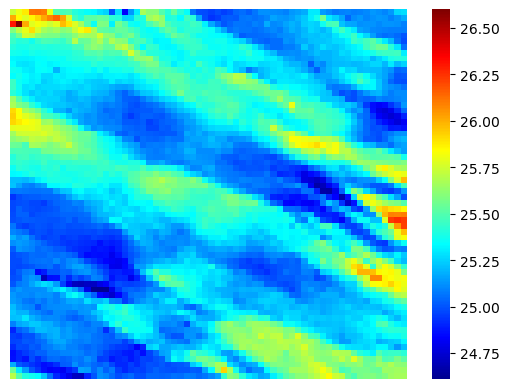

In [25]:
plotting.show_image(rimg)